In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pandas import ExcelWriter
from pandas import ExcelFile
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Exploring the data:

How many rows are in this data set? How many columns? What do the rows and columns represent?

In [55]:
df = pd.read_excel("../data/Folds5x2_pp.xlsx",sheet_name = 'Sheet1')

In [56]:
df.shape

(9568, 5)

In [57]:
df.columns
print("There are 9568 rows and 5 columns in the Dataset")
print("Each row shows the hourly average Temperature (T), Ambient Pressure (AP),Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electricalenergy output (EP) of the plant")

There are 9568 rows and 5 columns in the Dataset
Each row shows the hourly average Temperature (T), Ambient Pressure (AP),Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electricalenergy output (EP) of the plant


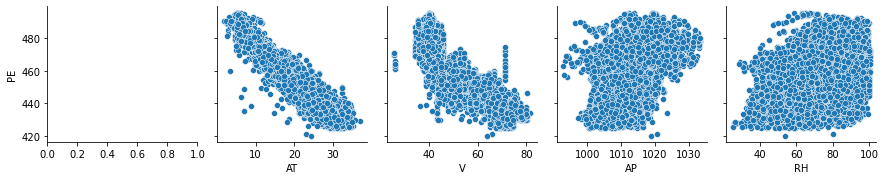

In [58]:
sns.pairplot(data = df, x_vars = ['','AT','V', 'AP', 'RH'],y_vars=['PE'])

The AT which is Ambient pressure shows a negative correlation between AT and PE, which means when AT higher,PE lower, and vice versa \
The V which is Exhaust Vacuum shows a negative correlation between V and PE, which means when V higher,PE lower, and vice versa \
The AP which is Exhaust Vacuum shows a negative correlation between Ambient Pressure and PE, which means when Ambient Pressure higher,PE higher \
The RH can not show

In [59]:
np_df = df.to_numpy()
lower = np.percentile(np_df, 25)
median = np.percentile(np_df, 50)
upper = np.percentile(np_df, 75)
table = [[] for _ in range(5)]
for i in range(0,5):
    col = np_df[:,i]
    table[i].append(np.percentile(col, 25)) 
    table[i].append(np.percentile(col, 50))
    table[i].append(np.percentile(col, 75))
    table[i].append(np.amax(col) - np.amin(col))
    table[i].append((np.percentile(col,75) - np.percentile(col,25)))  

In [60]:
table

[[13.51, 20.345, 25.72, 35.3, 12.209999999999999],
 [41.74, 52.08, 66.54, 56.2, 24.800000000000004],
 [1009.1, 1012.94, 1017.26, 40.40999999999997, 8.159999999999968],
 [63.3275, 74.975, 84.83, 74.6, 21.502499999999998],
 [439.75, 451.54999999999995, 468.43, 75.5, 28.680000000000007]]

In [61]:
# vals = [table[0],table[1],table[2],table[3],table[4]]
row_labels = ['AT', 'V', 'AP', 'RH', 'PE']
col_labels = ['first quartiles','median','third quartiles','range','interquartile range']
pd.DataFrame(table,columns = col_labels, index = row_labels)

,first quartiles,median,third quartiles,range,interquartile range
AT,13.5100,20.345,25.72,35.30,12.2100
V,41.7400,52.080,66.54,56.20,24.8000
AP,1009.1000,1012.940,1017.26,40.41,8.1600
RH,63.3275,74.975,84.83,74.60,21.5025
PE,439.7500,451.550,468.43,75.50,28.6800


C. For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back 
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.850
Model:                            OLS   Adj. R-squared (uncentered):              0.850
Method:                 Least Squares   F-statistic:                          4.347e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:16:13   Log-Likelihood:                         -50431.
No. Observations:                7654   AIC:                                  1.009e+05
Df Residuals:                    7653   BIC:                                  1.009e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

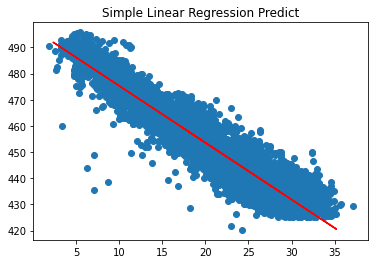

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          1.055e+05
Date:                Fri, 23 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:16:13   Log-Likelihood:                         -47392.
No. Observations:                7654   AIC:                                  9.479e+04
Df Residuals:                    7653   BIC:                                  9.479e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

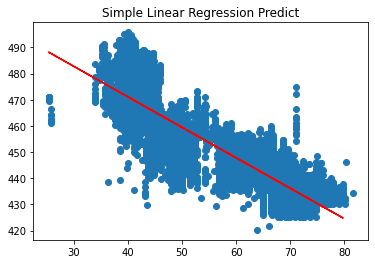

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          6.300e+06
Date:                Fri, 23 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:16:13   Log-Likelihood:                         -32003.
No. Observations:                7654   AIC:                                  6.401e+04
Df Residuals:                    7653   BIC:                                  6.401e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

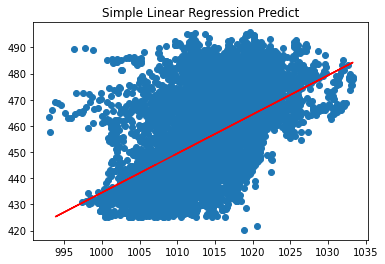

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                          2.179e+05
Date:                Fri, 23 Sep 2022   Prob (F-statistic):                        0.00
Time:                        23:16:13   Log-Likelihood:                         -44750.
No. Observations:                7654   AIC:                                  8.950e+04
Df Residuals:                    7653   BIC:                                  8.951e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

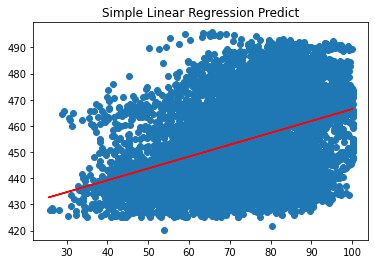

In [80]:
simplinear = []
for i in range(0,4):
    x = np_df[:,i]
    y = np_df[:,-1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    est = sm.OLS(y_train.reshape(-1,1), x_train.reshape(-1,1))
    res = est.fit()
    print(res.summary())
    model = LinearRegression().fit(x_train.reshape(-1,1), y_train.reshape(-1,1))
    simplinear.append(model.coef_[0][0])
    y_pred = model.predict(x_test.reshape(-1,1)) 
    plt.scatter(x_train.reshape(-1,1), y_train.reshape(-1,1))
    plt.plot(x_test, y_pred, color = 'red')
    plt.title('Simple Linear Regression Predict')
    plt.show()


D. Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis H0:βj = 0?

In [63]:
x = df[['AT', 'V', 'AP','RH']]
y = df['PE']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
model = LinearRegression().fit(x_train, y_train)

In [64]:
multilinear = model.coef_

In [65]:
model_multi = ols('PE ~ AT+V+AP+RH',df).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:16   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

E. How do your results from 1c compare to your results from 1d? Create a plot
displaying the univariate regression coefficients from 1c on the x-axis, and the
multiple regression coefficients from 1d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate in the multiple linear
regression model is shown on the y-axis.

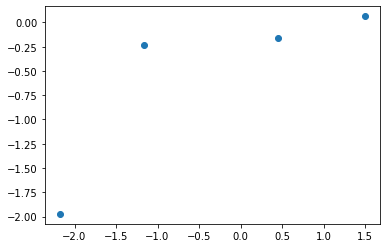

In [66]:
plt.scatter(simplinear, multilinear)
plt.show()

F. Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor
X, fit a model of the form

In [67]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

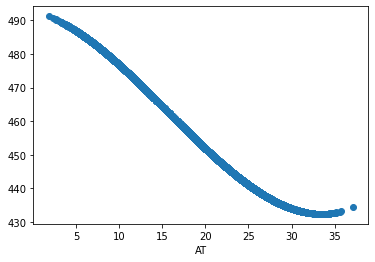

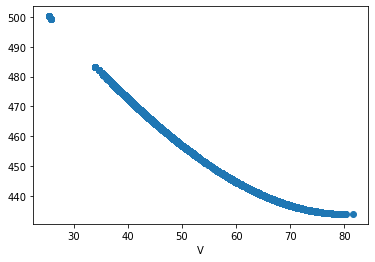

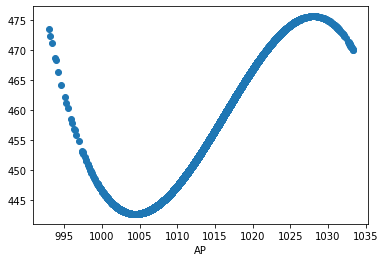

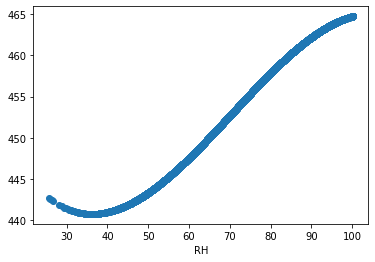

In [68]:
for i in range (0, 4):
    x_f = (df.iloc[:,i]).values.reshape(-1,1)
    y_f = (df.iloc[:,-1]).values.reshape(-1,1)
    poly = PolynomialFeatures(degree=3)
    x_poly = poly.fit_transform(x_f)
    poly.fit(x_poly, y_f)
    poly_reg = LinearRegression().fit(x_poly, y_f)
    y_pred = poly_reg.predict(poly.fit_transform(x_f))
    plt.scatter(x_f ,y_pred)
    plt.xlabel(df.columns[i])
    plt.show()

In [69]:
list = ['AT','V','AP','RH']
for i in range(0,4):
    for j in range(0,4):
        if i != j and j>i:
            after_joindata =  df.loc[:,df.columns[i]] * df.loc[:,df.columns[j]]
            print(list[i]+' and '+list[j])
            y = df.iloc[:,-1]
            x_train = sm.add_constant(after_joindata)
            estimate = sm.OLS(y, x_train)
            result = estimate.fit()
            print(result.summary())

AT and V
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                 6.581e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:16   Log-Likelihood:                -30846.
No. Observations:                9568   AIC:                         6.170e+04
Df Residuals:                    9566   BIC:                         6.171e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        483.2069      0.128   3761.234

Since p value all lower than 0.05,there is not enough evidnece to reject the null hypothesis.

G. Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant.

In [70]:
inter_model = ols('PE ~ AT+V+AP+RH+AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH',df).fit()
print(inter_model.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:16   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

A：AT and AP V and RH's interaction has no statistical significant

H. Improvement

In [71]:
df_impro = df.loc[:, df.columns != 'PE'] ** 2
df_impro = df_impro.rename(columns={'AT': 'AT_sq', 'V': 'V_sq', 'AP': 'AP_sq', 'RH': 'RH_sq'})
df_aj = df.join(df_impro)
df_train, df_test = train_test_split(df_aj, test_size = 0.2, random_state=1)
df_trainY = df_train['PE']
df_trainX = df_train.drop(columns=['PE'])
df_testY = df_test['PE']
df_testX = df_test.drop(columns=['PE'])
modeli1 = ols('PE ~ AT+V+AP+RH+AT*V+AT*AP+AT*RH+V*AP+V*RH+AP*RH+AT_sq+V_sq+AP_sq+RH_sq',df_train).fit()
print(modeli1.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     8136.
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:17   Log-Likelihood:                -21958.
No. Observations:                7654   AIC:                         4.395e+04
Df Residuals:                    7639   BIC:                         4.405e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7471.7170   1324.613     -5.641      0.0

In [72]:
pred_test = modeli1.predict(df_test)
mse_test = mean_squared_error(df_testY, pred_test)
pred_train = modeli1.predict(df_train)
mse_train = mean_squared_error(df_trainY, pred_train)
print('The MSE of train set is',mse_train,', and the MSE of test set is',mse_test)

The MSE of train set is 18.170901545968142 , and the MSE of test set is 17.86717954157637


In [73]:
df_aj.head()

,AT,V,AP,RH,PE,AT_sq,V_sq,AP_sq,RH_sq
0,14.96,41.76,1024.07,73.17,463.26,223.8016,1743.8976,1.048719e+06,5353.8489
1,25.18,62.96,1020.04,59.08,444.37,634.0324,3963.9616,1.040482e+06,3490.4464
2,5.11,39.40,1012.16,92.14,488.56,26.1121,1552.3600,1.024468e+06,8489.7796
3,20.86,57.32,1010.24,76.64,446.48,435.1396,3285.5824,1.020585e+06,5873.6896
4,10.82,37.50,1009.23,96.62,473.90,117.0724,1406.2500,1.018545e+06,9335.4244


Remove the attribute that statistically insignificant

In [74]:
modeli2 = ols('PE ~ AT+V+AP+RH+AT*V+AT*RH+AP*RH+AT_sq+AP_sq+RH_sq',df_train).fit()
print(modeli2.summary())
pred_test = modeli2.predict(df_test)
mse_test = mean_squared_error(df_testY, pred_test)
pred_train = modeli2.predict(df_train)
mse_train = mean_squared_error(df_trainY, pred_train)
print('The MSE of train set is',mse_train,', and the MSE of test set is',mse_test)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                 1.137e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        23:15:17   Log-Likelihood:                -21965.
No. Observations:                7654   AIC:                         4.395e+04
Df Residuals:                    7643   BIC:                         4.403e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.017e+04   1010.297    -10.064      0.0

I. KNN/raw

In [75]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [76]:
df_Y= df.iloc[:,-1:]
df_x= df.iloc[:,0:-1]
x_train, x_test, y_train, y_test = train_test_split(df_x, df_Y, test_size=0.3, random_state = 100)
error_Train= []
error_Test = []
Train_MSE_Result = len(df_Y)
Test_MSE_Result = len(df_x)
best_train_k = 0
best_test_k = 0
k_num = []
for k in range(1,100,2):
    k_num.append(1/k)
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train, y_train)
    knn_tmp = knn.predict(x_train)
    y_train_predict = knn.predict(x_train)
    trainms_point = mean_squared_error(y_train,y_train_predict)
    error_Train.append(trainms_point)
    if trainms_point <= Train_MSE_Result:
        Train_MSE_Result = trainms_point 
        best_train_k = k
    y_test_predict = knn.predict(x_test)
    testms_point = mean_squared_error(y_test,y_test_predict)
    error_Test.append(testms_point)
    if testms_point  <= Test_MSE_Result:
        Test_MSE_Result = testms_point
        best_test_k = k
print(best_train_k)
print(error_Train)
print(best_test_k)
print(error_Test)

1
[0.0, 7.646645360277405, 10.132056471853076, 11.584462035696767, 12.623929091153766, 13.37844558115945, 14.001032642894955, 14.46252285746521, 14.874278307024834, 15.237141581731098, 15.626367676764598, 15.982576819911738, 16.221967466077345, 16.453963341221307, 16.70583904314441, 16.99296215355407, 17.189204948942372, 17.377098367639483, 17.557057125466272, 17.70845897986646, 17.899362374382157, 18.092139263304357, 18.255949111549846, 18.38027738896891, 18.515846839388075, 18.709298803052803, 18.852632882121842, 18.957016396876856, 19.104139003002633, 19.22819732941773, 19.346736925649935, 19.441155698928142, 19.554238381166872, 19.68045760001727, 19.787228230492655, 19.892445333307933, 19.990125245553074, 20.13443163671959, 20.238467641477357, 20.35269876826902, 20.446180864087143, 20.542882304868343, 20.630417679093, 20.74213793302897, 20.836164192829848, 20.93502694564814, 21.0087637969473, 21.090935202781942, 21.18105507982415, 21.26851841206837]
5
[21.701978369905955, 17.486851

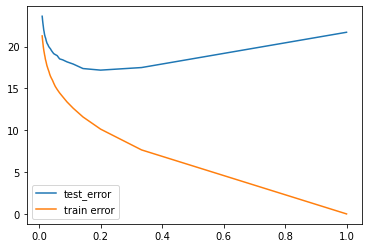

In [77]:
plt.plot(k_num,error_Test, label='test_error')
plt.plot(k_num,error_Train, label = 'train error')
plt.legend()

J:linear's best is at 17.8 while knn is at 17.90,As linear regression do bad than KNN on non linear and provide a poor fit to the data. In attributes with linear relationship, two model provides the same performance. Besides, linear performs better on small size data

For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

(a) The sample size n is extremely large, and the number of predictors p is small.

A：When the predictor is small，a more flexible model can avoid the overfitting，otherwise, overfitting can also be eliminated by decrease the attribute number

(b) The number of predictors p is extremely large, and the number of observations n is small.

A less flexible model should be used

(c) The relationship between the predictors and response is highly non-linear.

Use flexible model since the inflexible method may failed to find the non-linear interaction

(d) The variance of the error terms, i.e. σ2 = Var(), is extremely high

The error means there should be many noise and outlier. Use flexible method to avoid overfitting because high variance varies a lot

Compute the Euclidean distance between each observation and the test point, X1=X2=X3=0

In [ ]:
import math
ed1=math.sqrt(3^2)
ed2=math.sqrt(2^2)
ed3=math.sqrt(1^2+3^2)
ed4=math.sqrt(1^2+2^2)
ed5=math.sqrt(1^2+1^2)
ed6=math.sqrt(1^2+1^2+1^2)
print(ed1,ed2,ed3,ed4,ed5,ed6)


(b) What is our prediction with K = 1? Why?

should be ed5 because (-1,0,1) is the closest

(c) What is our prediction with K = 3? Why?

for k = 3 ed2,ed5,ed6 shows same distance, but there are two red over one green, therefore, red


(d) If the Bayes decision boundary in this problem is highly nonlinear, then would we expect the best value for K to be large or small? Why?

less variance is better for Bayes decision therefore we should use small k value